In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [83]:
df = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
df.drop(columns= ['customerID'] ,inplace =True)

In [85]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [87]:
df.duplicated().sum()

22

In [88]:
df.drop_duplicates(inplace=True)

In [89]:
df = df[df['TotalCharges'] != ' ']
# 20-30 rowss got deleted due to improper data

In [90]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

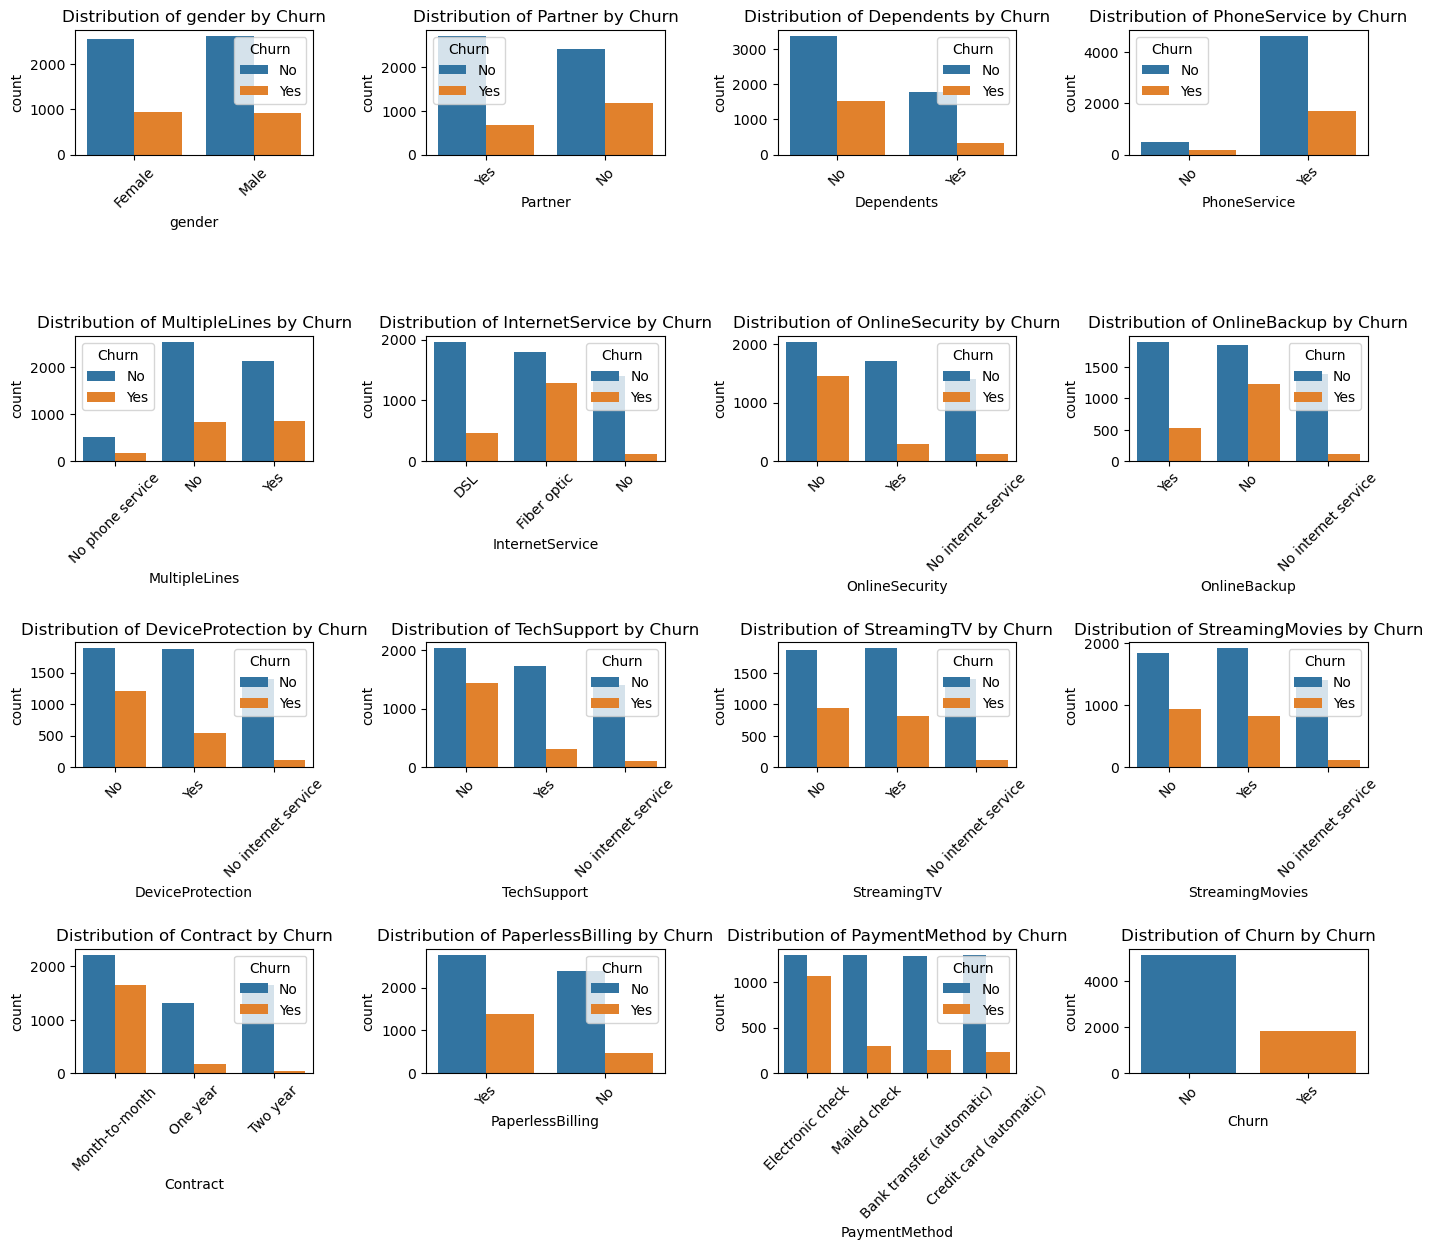

In [91]:
plt.figure(figsize = (14,14))
# cols = []

# for col in df.select_dtypes(include= "object"):
#     # if df[col].nunique() < 4:  # Only include categorical columns with reasonable number of categories
#         cols.append(col)

for i, col in enumerate(df.select_dtypes(include='object')):
    plt.subplot(5, 4, i+1)
    sns.countplot(data=df, x=col, hue=df['Churn'])
    plt.title(f'Distribution of {col} by Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [92]:
"""
#observations 
1)As the contract duration inc the risk of churn decreses drastically
2)The labels of churn are slightly imbalanced ( can be use for further process)
3)In all cases ,peoples with "No internet services "  has very less people contributing to churn
"""

'\n#observations \n1)As the contract duration inc the risk of churn decreses drastically\n2)The labels of churn are slightly imbalanced ( can be use for further process)\n3)In all cases ,peoples with "No internet services "  has very less people contributing to churn\n'

In [93]:
le = LabelEncoder()

In [94]:
for col in df.select_dtypes(include= "object"):
    if df[col].nunique() <4:
        # print(f'{col } :  {df[col].nunique()}')
        df[col]  = le.fit_transform(df[col])

In [95]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1


In [96]:
corr = df.corr(numeric_only=True)

corr = corr[(corr > 0.3) | (corr < -0.3)]
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,NaN,NaN,1.000000,0.451254,0.379564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317021,NaN
Dependents,NaN,NaN,0.451254,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,NaN,NaN,0.379564,NaN,1.000000,NaN,0.341092,NaN,0.327588,0.372391,0.372635,0.324995,NaN,NaN,0.675876,NaN,NaN,0.825293,-0.353339
PhoneService,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,0.387380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,NaN,NaN,NaN,NaN,0.341092,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.432571,0.451510,NaN
InternetService,NaN,NaN,NaN,NaN,NaN,0.38738,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.319423,NaN,NaN
OnlineSecurity,NaN,NaN,NaN,NaN,0.327588,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.374122,NaN,NaN,NaN,NaN
OnlineBackup,NaN,NaN,NaN,NaN,0.372391,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375430,NaN


In [97]:
""""
# obervations
1)columns such as [Gender , seniorcitizen ] has no correlation with any other columns
2)no high correlation (~90%)

"""

df.drop(columns = ["SeniorCitizen" , "gender"] , inplace =True)

In [98]:
from sklearn.preprocessing import OneHotEncoder

In [99]:
ohe = OneHotEncoder(sparse_output=False)
payment_encoded = ohe.fit_transform(df[['PaymentMethod']])
payment_columns = ohe.get_feature_names_out(['PaymentMethod'])

payment_df = pd.DataFrame(payment_encoded, columns=payment_columns, index=df.index)

df = df.drop('PaymentMethod', axis=1)
df = pd.concat([df, payment_df], axis=1)

In [100]:
df.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,2,0,0,...,0,0,1,29.85,29.85,0,0.0,0.0,1.0,0.0
1,0,0,34,1,0,0,2,0,2,0,...,0,1,0,56.95,1889.50,0,0.0,0.0,0.0,1.0
2,0,0,2,1,0,0,2,2,0,0,...,0,0,1,53.85,108.15,1,0.0,0.0,0.0,1.0
3,0,0,45,0,1,0,2,0,2,2,...,0,1,0,42.30,1840.75,0,1.0,0.0,0.0,0.0
4,0,0,2,1,0,1,0,0,0,0,...,0,0,1,70.70,151.65,1,0.0,0.0,1.0,0.0


In [101]:
x = df.drop('Churn' ,axis = 1)
y = df.Churn

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [104]:
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])


In [105]:

pipeline = DecisionTreeClassifier(random_state=42)
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7297

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1081
           1       0.43      0.53      0.47       321

    accuracy                           0.73      1402
   macro avg       0.64      0.66      0.65      1402
weighted avg       0.75      0.73      0.74      1402


Confusion Matrix:
[[852 229]
 [150 171]]


In [106]:
from sklearn.ensemble import RandomForestClassifier

rf_pip = Pipeline([
    ('std_scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(random_state=42))
])

In [107]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8017

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1081
           1       0.58      0.50      0.54       321

    accuracy                           0.80      1402
   macro avg       0.72      0.70      0.71      1402
weighted avg       0.79      0.80      0.80      1402


Confusion Matrix:
[[962 119]
 [159 162]]


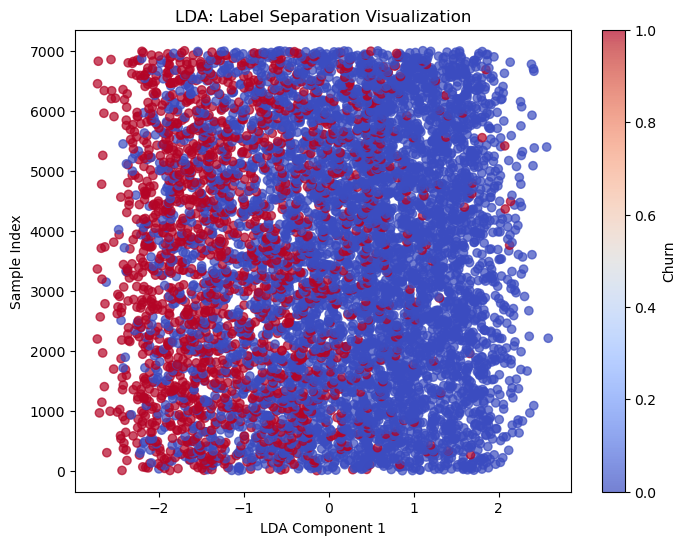

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)  # n_components=1 for 1D visualization
x_lda = lda.fit_transform(x, y)

# Visualize the result
plt.figure(figsize=(8,6))
plt.scatter(x_lda[:, 0], y=range(len(x_lda)), c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('LDA Component 1')
plt.ylabel('Sample Index')
plt.title('LDA: Label Separation Visualization')
plt.colorbar(label='Churn')
plt.show()

In [ ]:
#observations
#labels are overlaped and its hard to distinguish